In [266]:
# Import external packages

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

# 10 years' historical Stock Price Data from Yahoo Finance
# 7 Big Tech : AAPL, AMZN , GOOGL, META, MSFT, NVDA, TSLA

In [267]:
#Portfolio consist of "The seven big tech firms"
# AAPL, AMZN , GOOGL, META, MSFT, NVDA, TSLA

tickers = ['AAPL', 'AMZN' , 'GOOGL', 'META', 'MSFT','NVDA', 'TSLA']

stocks_data = pd.DataFrame()

for ticker in tickers:
    stock = yf.download(ticker, start = '2013-1-1', end = '2022-12-31')['Adj Close']
    stocks_data[ticker] = stock

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


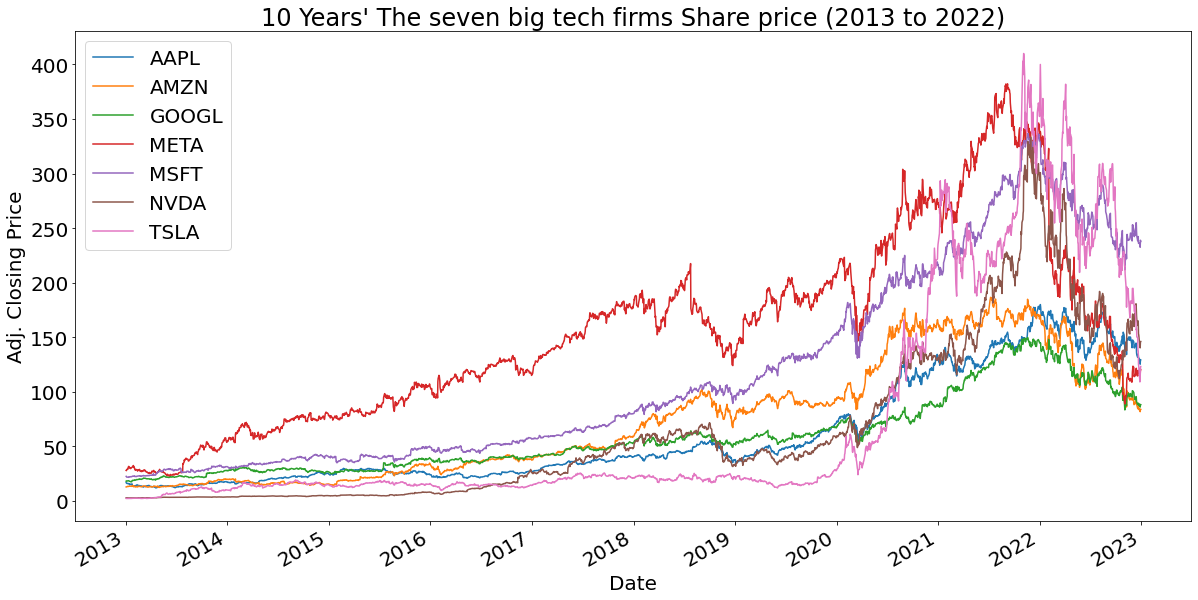

In [268]:
for ticker in tickers:
    stocks_data[ticker].plot(figsize=(20,10))
plt.legend()
plt.xlabel('Date')
plt.ylabel ('Adj. Closing Price')
plt.title("10 Years' The seven big tech firms Share price (2013 to 2022)")
plt.rcParams.update({'font.size': 20})
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20) 
plt.show()

# Historical log returns

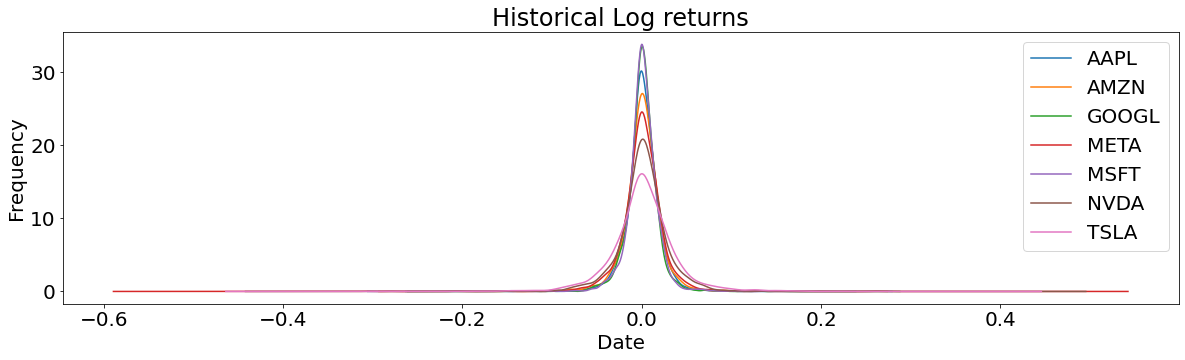

In [269]:
log_returns = np.log(1 + stocks_data.pct_change())
log_returns.plot.density(figsize=(20,5))

plt.legend()
plt.xlabel('Date')
plt.ylabel ('Frequency')
plt.title("Historical Log returns")
plt.rcParams.update({'font.size': 20})
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20) 
plt.show()

# Portfolio valuation and statistical metrices - expected return & std

In [270]:
# Portfolio valuation

p_value = 1000000

#Setting equal weights to each of the 7 shares in the portfolio that is 14.2% each 
weights = np.array([1/len(tickers)]*len(tickers))

#Calculate statistical measures of historical returns
def exp_return(weights, log_returns):
    return np.sum(log_returns.mean()*weights)

def STD(weights, log_returns):
    cov_matrix = log_returns.cov()
    return np.sqrt(weights.T @ cov_matrix @ weights)


p_exp_return = expected_return(weights, log_returns)
p_std_dev = STD(weights, log_returns)

# Simulating portfolio gain & loss over the holding period

In [271]:
def random_z_score():
    return np.random.normal(0,1)

def scenario_gain_loss(p_value, p_exp_return, p_std_dev, z_score, days):
    return ((p_value * p_exp_return * days) + (p_value * p_std_dev * z_score * np.sqrt(days))) 

In [278]:
days = 30
simulations = 10000

scenario_return = []

for i in range(simulations):
    z_score = random_z_score()
    
    gain_loss = scenario_gain_loss(p_value, p_exp_return, p_std_dev, z_score, days)
    scenario_return.append(gain_loss)

# Quantification of the Simulations - VaR and Confidence Intervals

In [279]:
confidence_intervals = [0.90, 0.95, 0.99]
VaR = []

for ci in confidence_intervals:
    value = - np.percentile(scenario_return, 100*(1-ci))
    VaR.append(value)

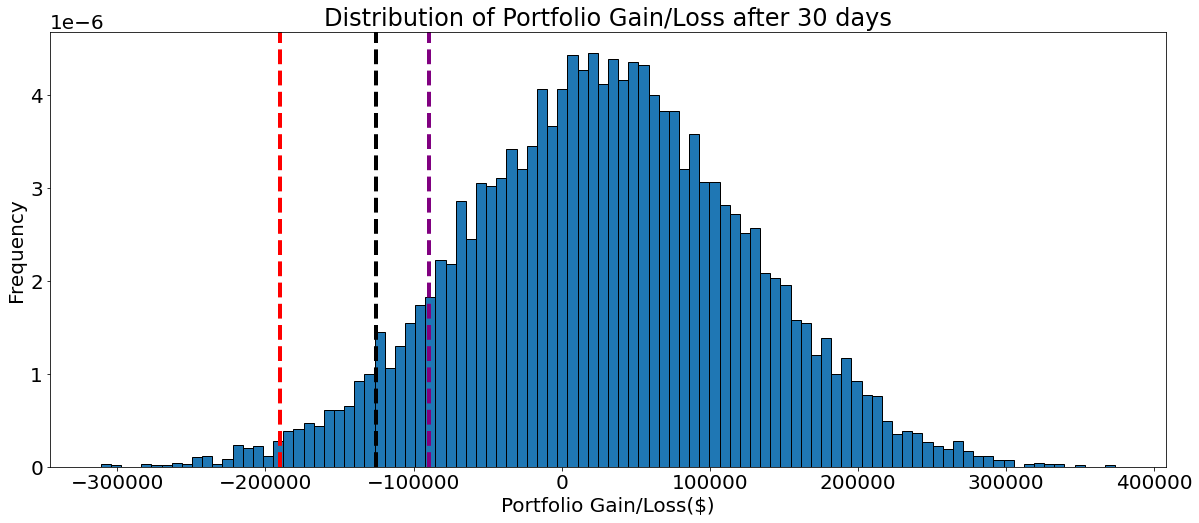

For 30 days holding period VaR at 90% confidence level : $89,817 which is 9% of Portfolio Value
For 30 days holding period VaR at 95% confidence level : $125,073 which is 13% of Portfolio Value
For 30 days holding period VaR at 99% confidence level : $190,456 which is 19% of Portfolio Value

For 30 days holding period the most likely retun is : $29,584 which is 3% of Portfolio Value


In [292]:
plt.figure(figsize=(20,8))
plt.hist(scenario_return, bins=100, edgecolor='black', density=True);
plt.xlabel('Portfolio Gain/Loss($)')
plt.ylabel ('Frequency')
plt.title('Distribution of Portfolio Gain/Loss after ' +str(days)+ ' days')
plt.rcParams.update({'font.size': 20})
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20) 
plt.axvline(-VaR[0], color = 'purple', linestyle = 'dashed', linewidth = 4)
plt.axvline(-VaR[1], color = 'black', linestyle = 'dashed', linewidth = 4)
plt.axvline(-VaR[2], color = 'red', linestyle = 'dashed', linewidth = 4)
plt.show()

i=0
for ci in confidence_intervals:
    value = VaR[i]
    loss = value/p_value
    print("For {:,.0f} days holding period VaR at {:.0%} confidence level : ${:,.0f} which is {:,.0%} of Portfolio Value".format(days,ci, value, loss))
    i=i+1
    

import statistics
median_gain_loss = statistics.median(scenario_return) 
median_return = median_gain_loss/p_value
print()
print("For {:,.0f} days holding period the most likely retun is : ${:,.0f} which is {:,.0%} of Portfolio Value".format(days, median_gain_loss, median_return))